## 1. Data Loading and Exploration

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [96]:
df1 = pd.read_csv("DATA/gender_submission.csv")
df1.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [97]:
df2 = pd.read_csv("DATA/test.csv")
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [98]:
df = pd.read_csv("DATA/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Dictionary:
* Survived: 0 = No, 1 = Yes
* pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
* sibsp: # of siblings / spouses aboard the Titanic
* parch: # of parents / children aboard the Titanic
* ticket: Ticket number
* cabin: Cabin number
* embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [99]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [112]:
female_age = df[df['Sex'] == 'female']['Age']
male_age = df[df['Sex'] == 'male']['Age']

female_median_age = female_age.median()
male_median_age = male_age.median() 

In [118]:
df['Age'] = np.where((df['Age'].isna()) & (df['Sex'] == 'female'), female_median_age, df['Age'])
df['Age'] = np.where((df['Age'].isna()) & (df['Sex'] == 'male'), male_median_age, df['Age'])

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 2. Visualizations using MatPlotLib

### a. *Create a bar chart showing the count of passengers in each passenger class (1st, 2nd, 3rd).*

In [125]:
class_counts = df['Pclass'].value_counts().sort_index()
class_counts

Pclass
1    216
2    184
3    491
Name: count, dtype: int64

In [126]:
classes = class_counts.index
classes

Index([1, 2, 3], dtype='int64', name='Pclass')

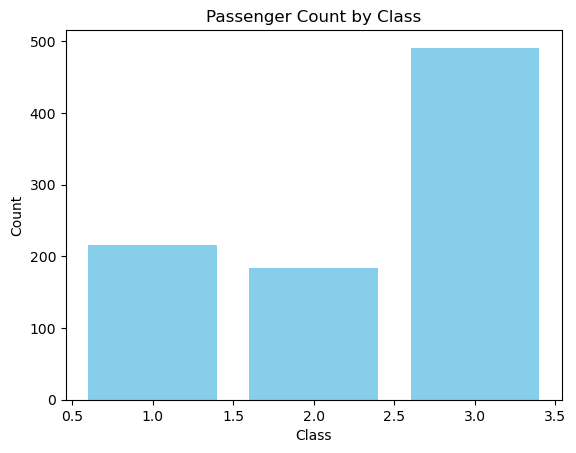

In [129]:
plt.bar(classes, class_counts, color='skyblue')
plt.title('Passenger Count by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### b. *Create a histogram of passenger ages, labeling the x-axis as "Age" and the y-axis as "Count."*

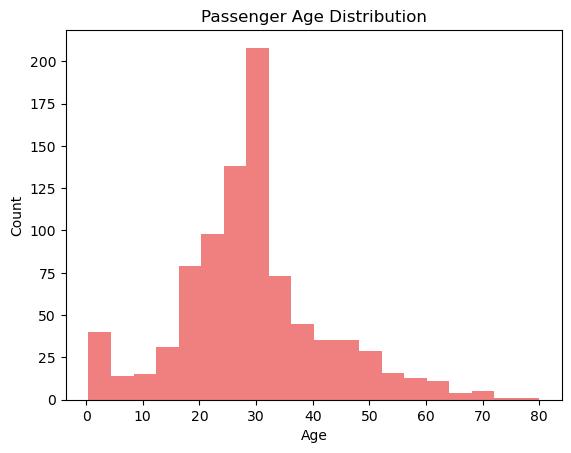

In [137]:
plt.hist(df['Age'], bins=20, color='lightcoral')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Passenger Age Distribution")
plt.show()

### c. *Create a pie chart to show the distribution of male and female passengers.*

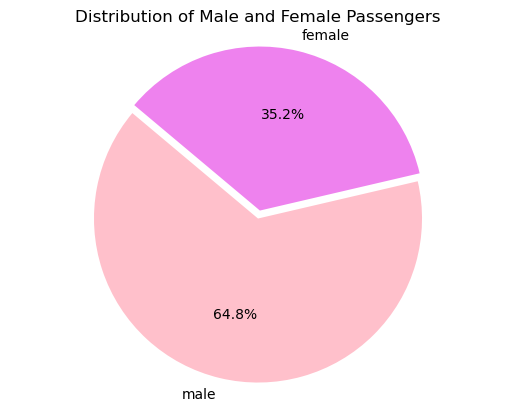

In [142]:
plt.pie(df['Sex'].value_counts().values, labels = df['Sex'].value_counts().index, colors = ['pink', 'violet'], autopct='%1.1f%%', startangle=140, explode = (0, 0.05))
plt.title('Distribution of Male and Female Passengers')
plt.axis('equal')
plt.show()

### d. *Create a box plot for the fare to visualize its distribution.*

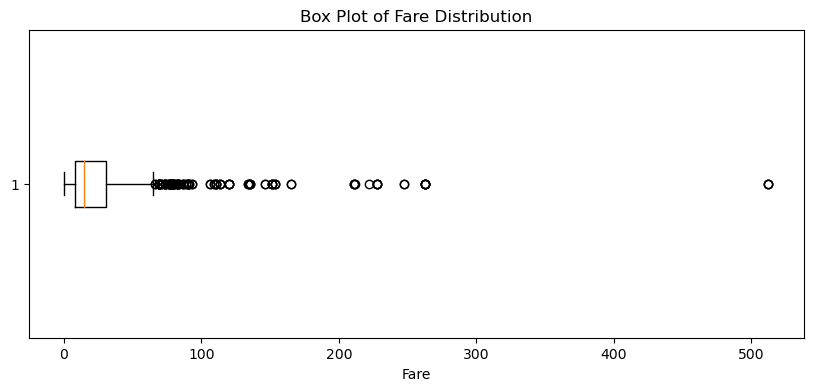

In [148]:
plt.figure(figsize=(10, 4))
plt.boxplot(df['Fare'], vert = False)
plt.xlabel('Fare')
plt.title('Box Plot of Fare Distribution')
plt.show()

## 3. Visualizations using Seaborn

### a. *Create a heatmap showing the correlation between different numerical features in the dataset. Annotate the heatmap with the correlation values.*

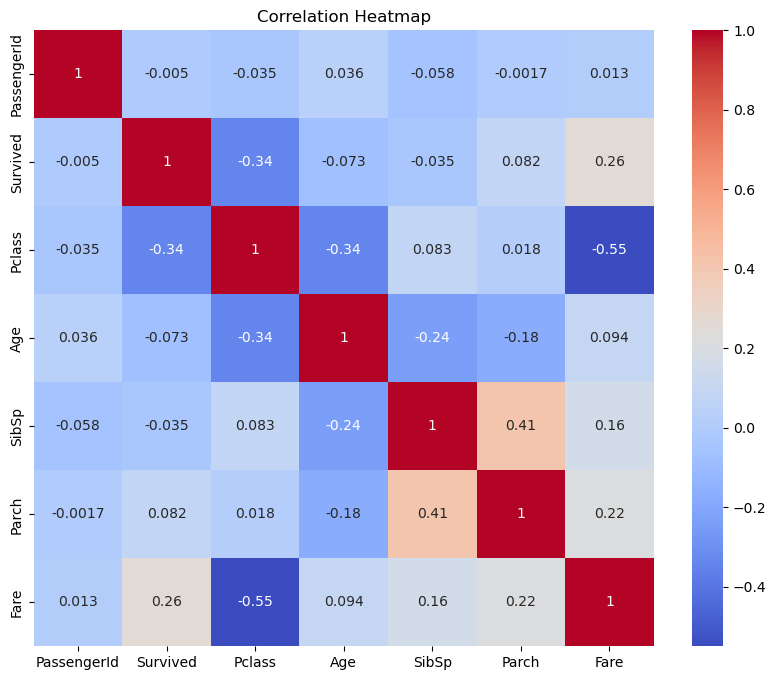

In [152]:
correlation_matrix = df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
plt.figure(figsize=(10, 8)) 
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### b. *Create a violin plot to visualize the distribution of ages by passenger class. Each violin plot should represent a different class.*

C:\Users\Aryan\ML\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aryan\ML\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aryan\ML\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


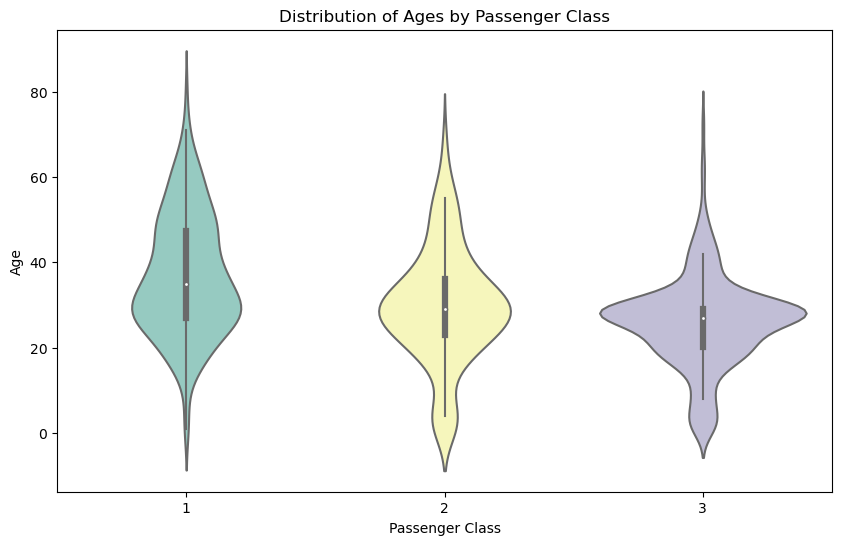

In [153]:
plt.figure(figsize=(10, 6))  
sns.violinplot(x=df["Pclass"], y=df["Age"], data=df, palette="Set3")
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.title("Distribution of Ages by Passenger Class")
plt.show()

### c. *Create a count plot to show the number of survivors and non-survivors, differentiating by passenger class. Use different colors for each class.*

C:\Users\Aryan\ML\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aryan\ML\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aryan\ML\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aryan\ML\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

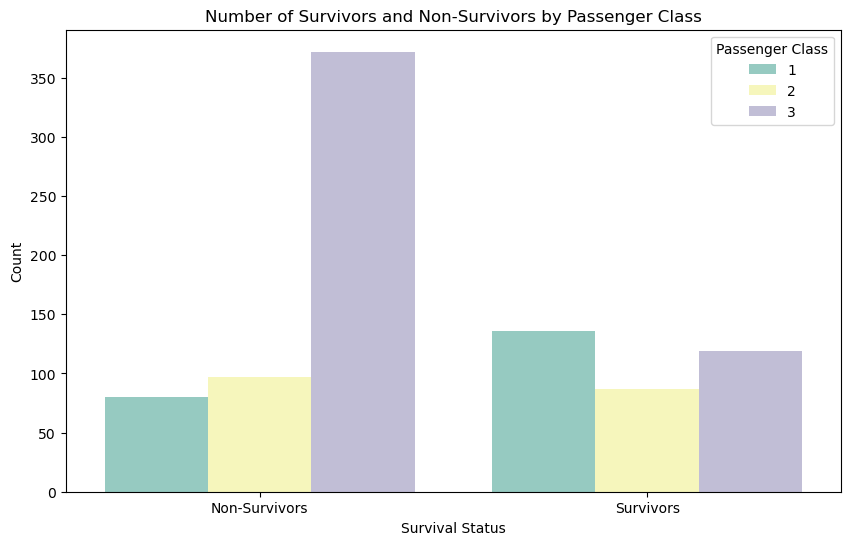

In [159]:
plt.figure(figsize=(10, 6))  
plot = sns.countplot(x=df["Survived"], hue=df["Pclass"], palette="Set3")

plt.xlabel("Survival Status")
plt.ylabel("Count")

plt.title("Number of Survivors and Non-Survivors by Passenger Class")
plt.legend(title="Passenger Class", loc="upper right")

plot.set_xticklabels(["Non-Survivors", "Survivors"])

plt.show()

### d. *Create a pair plot for numerical features to explore relationships between them.*

C:\Users\Aryan\ML\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aryan\ML\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aryan\ML\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aryan\ML\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

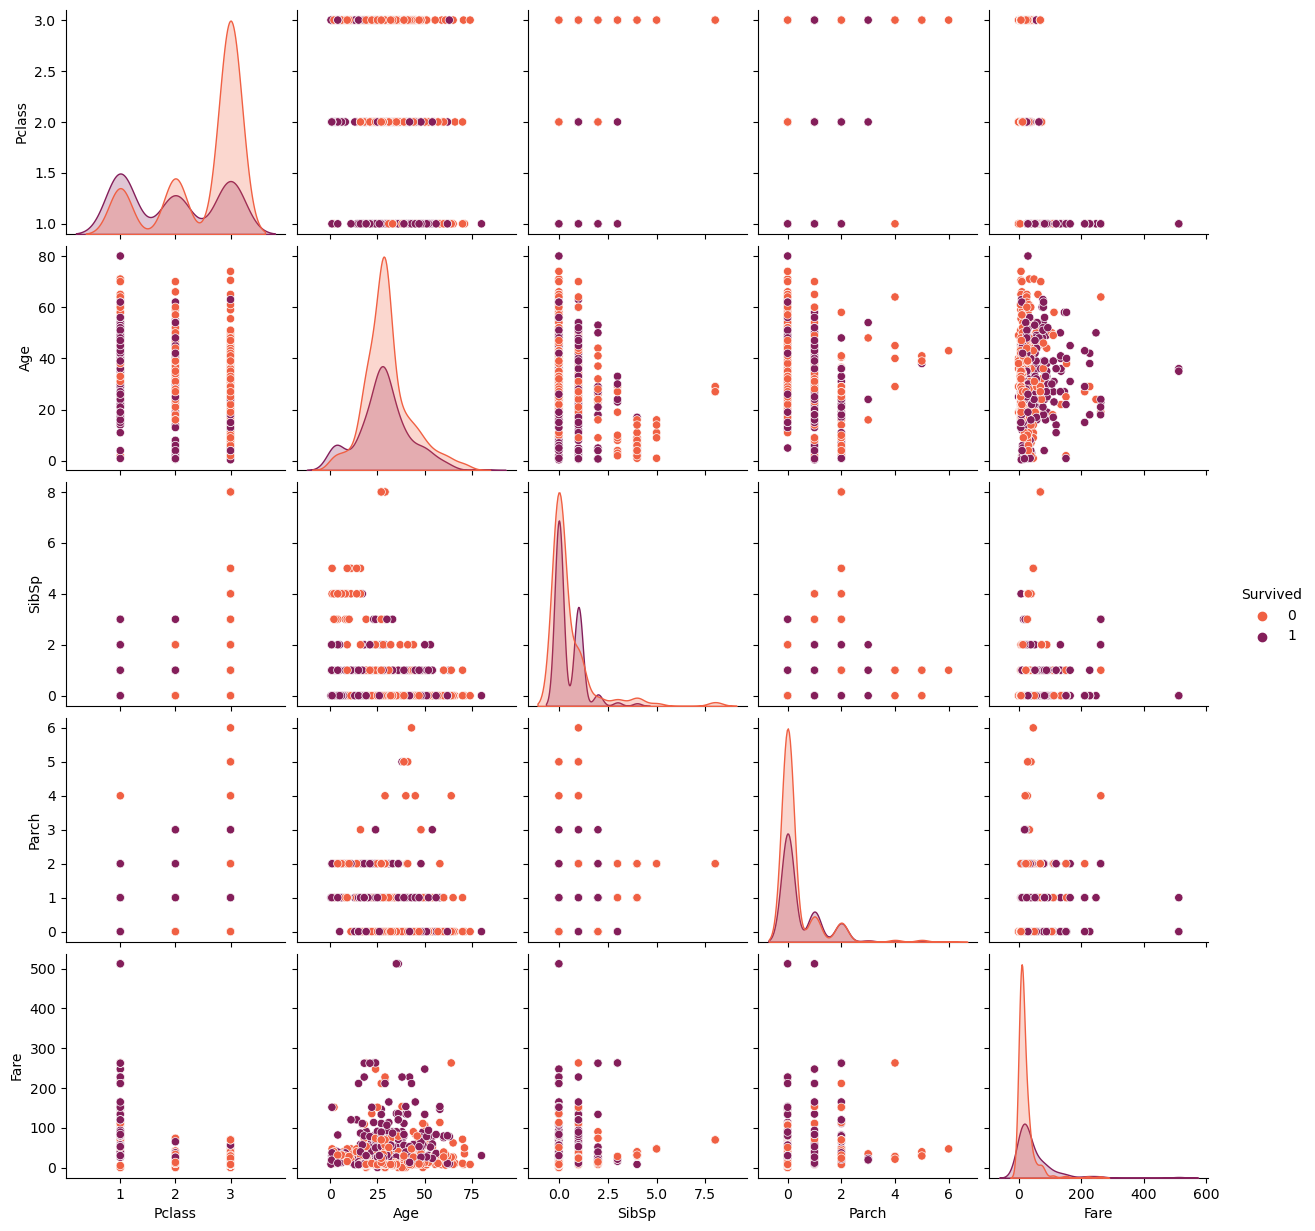

In [163]:
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']], hue='Survived', palette='rocket_r');

#### What is the distribution of passengers by class?
- The majority of passengers were in 3rd class (491 passengers), indicating that the Titanic had a larger number of passengers traveling in lower-class accommodations.The significant difference in the number of passengers between 1st class (216 passengers) and 3rd class suggests economic disparities among the passengers on the Titanic. 1st class passengers likely had higher socio-economic status.

#### What is the age distribution of passengers on the Titanic?
- The age distribution of Titanic passengers is right-skewed, with the majority of passengers in their late 20s to early 30s, as indicated by the peak in the histogram. The distribution ranges from infants to elderly passengers, with a wide age range represented among the passengers.

### What is the gender distribution among passengers?
- The gender distribution shows that there were more male passengers than female passengers on the Titanic.

#### Are there any interesting relationships between numerical features in the dataset?
- Pclass vs. Age and Fare: The pair plot also suggests that passenger class (Pclass) is associated with both age and fare. 1st class passengers tend to be older and paid higher fares, while 3rd class passengers are generally younger and paid lower fares.

- Survival vs. Age: The pair plot indicates that there may be a slightly different age distribution between survivors and non-survivors. Survivors tend to have a wider age range, including both younger and older passengers.

- Survival vs. Fare: There seems to be a relationship between fare paid and survival. Passengers who paid higher fares appear to have a better chance of survival.

- SibSp and Parch: There isn't a clear and direct relationship between the number of siblings/spouses (SibSp) or parents/children (Parch) and survival based on the pair plot.

#### What is the survival rate for each passenger class?

- 1st Class: Among 1st class passengers, a larger proportion survived compared to those who did not survive, indicating a relatively high survival rate for this class.

- 2nd Class: The count plot suggests that the survival rate for 2nd class passengers is moderate, with a noticeable number of both survivors and non-survivors.

- 3rd Class: 3rd class passengers appear to have a lower survival rate compared to the other classes, as indicated by a larger number of non-survivors and a relatively smaller number of survivors.

#### How does age distribution vary by passenger class?
- 1st class passengers show a wide age distribution with some elderly passengers, as indicated by the broad and relatively higher violin plot, suggesting a mix of age groups in this class.

- 2nd class passengers have a moderately broad age range, with the violin plot showing a slightly younger median age (below 30), indicating a relatively even distribution across ages.

- 3rd class passengers appear to be predominantly young adults and children, with the violin plot displaying a peak in the lower age range, suggesting a concentration of younger passengers in this class.